In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2

def imarray(str):
    arr=np.asarray(Image.open(str))
    return np.array([[arr[i][j][:3] for j in range(arr.shape[1])] for i in range(arr.shape[0])])

def sizereduct(arr,div):
    arr = np.array([[ arr[i][j]for j in range(0,len(arr[i]),div)] for i in range(0,len(arr),div)])
    return arr


In [3]:
gauss=np.array([
    [-0.125,-0.125,-0.125],
    [-0.125,1,-0.125],
    [-0.125,-0.125,-0.125]
    ])

identity=np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
    ])

def gaussian(a,b):
    return a*gauss+b*identity

def saturatetane(arr,a=0.5):
    arr=arr/256
    
    arr=1/(1+np.exp(-a*(2*arr-1)))

    arr=arr*256
    arr=np.floor(arr)

    return arr.astype(np.uint8)

def saturatepara(arr,a,d=2):
    arr=arr/256

    b=(d-1)/a
    c=(d-1)/(a-1)

    arr=(b*arr*(arr-a)+arr)*(arr<=a)+(c*(arr-a)*(arr-1)+arr)*(arr>=a)

    arr=arr*256
    arr=np.floor(arr)

    return arr.astype(np.uint8)

def saturatecubic(arr,a=0.5,d=1):
    arr=arr/256

    j=d*max(-1/a,-1/(1-a))

    arr=j*arr*(arr-1)*(arr-a)+arr

    arr=arr*256
    arr=np.floor(arr)

    return arr.astype(np.uint8)

def colorout1(arr):
    temp=copy.deepcopy(arr)
    for element in temp:
        for elem in element:
            elem[0],elem[1],elem[2]=[(elem[0]//3+elem[1]//3+elem[2]//3)]*3

    return temp


def colorout2(arr):
    temp=copy.deepcopy(arr)
    for element in temp:
        for elem in element:
            elem[0],elem[1],elem[2]=[((elem[0]//1.732)**2+(elem[1]//1.732)**2+(elem[2]//1.732)**2)**0.5]*3

    return temp

def sidebyside(arr1,arr2):
    return np.concatenate((arr1,arr2),1)

def show(image):
    # cv2.imshow('HelloWorld', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # cv2.waitKey(0) 
    # cv2.destroyAllWindows()

    # plt.imshow(image)
    # plt.show()

    display(Image.fromarray(image, mode="RGB"))

def component(image,ord):

    temp=copy.deepcopy(image)
    
    for element in temp:
        for elem in element:
            elem[ord-1],elem[ord-2]=0,0

    return temp


In [ ]:
naruto = imarray("Naruto.png")
hinata = imarray("Hinata_multi.png")
itadori = imarray("Itadori.jpeg")
goku = imarray("DBL47-01S.png")
blue = imarray("BluelockPoster.jpeg")
bluelock = imarray("Bluelock.jpeg")

# itadori = sizereduct(itadori,2)
# goku = sizereduct(goku,3)

In [ ]:
isaigi = imarray("Isaigi.png")
reo = imarray("Reo.png")
bachira = imarray("Bachira.png")
barou = imarray("Barou.png")
chigiri = imarray("Chigiri.png")
nagi = imarray("Nagi.png")
baroured = imarray("BarouRed.png")

# reo = sizereduct(reo,4)
# bachira = sizereduct(bachira,4)
# chigiri = sizereduct(chigiri,4)
# nagi = sizereduct(nagi,4)
# barou = sizereduct(barou,4) 
# baroured = sizereduct(baroured,4)

In [ ]:
death = imarray("Death.jpeg")
hawks = imarray("Hawks.jpeg")
kaneki = imarray("Kaneki.jpeg")
itachi = imarray("Itachi.jpeg")
tomioka = imarray("Tomioka.jpeg")
deku = imarray("DekuUraraka.jpeg")

In [ ]:
kernel=gaussian(1,1.3)

itadorib = cv2.filter2D(itadori, -1, kernel)

show(255-itadorib)

itadori3 = np.array([[ itadori[i][j]//4+itadori[i+1][j]//4+itadori[i][j+1]//4+itadori[i+1][j+1]//4 for j in range(0,len(itadori[i])-1,2)] for i in range(0,len(itadori)-1,2)])

show(itadori3)

In [ ]:
kernel=gaussian(0.7,1.1)
show(cv2.filter2D(goku, -1, kernel))

show(goku)

In [ ]:

kernel=gaussian(-1.2,1)


show(cv2.filter2D(snb, -1, kernel))


show(snb)

In [ ]:


blue =np.array([[list(blue[row][column][:3]) for column in range(len(blue[row])) ]for row in range(len(blue))])

kernel=gaussian(1,1)

show(cv2.filter2D(blue, -1, kernel))


show(blue)

In [ ]:

image=itadori
show(image)
sa1=colorout1(image)
sa2=colorout2(image)
kernel=gaussian(10,0)
sharp=cv2.filter2D(sa2, -1, kernel)
show(sharp)

In [ ]:
image=blue
show(image)
sa1=copy.deepcopy(image)
sa2=copy.deepcopy(image)
sa3=copy.deepcopy(image)
for i in range(len(image)):
    for j in range(len(image[i])):
        sa1[i][j][1],sa1[i][j][2]=0,0
        sa2[i][j][0],sa2[i][j][2]=0,0
        sa3[i][j][1],sa3[i][j][0]=0,0

show(sidebyside(sidebyside(sa1,sa2),sa3))


In [ ]:
image=spandan
show(image)

sat=saturatepara(image,0.6)
show(sat)
kernel=gaussian(1.7,1)
sharp=cv2.filter2D(sat, -1, kernel)
show(sharp)

In [ ]:
image=ram
show(image)

kernel=gaussian(20,0)
sharp=cv2.filter2D(image, -1, kernel)
show(sharp)

sat=saturatecubic(image,0.2)
show(sat)

sa1=sidebyside(colorout2(image),colorout1(image))
show(sa1)


kernel=gaussian(1.5,1)
sharp=cv2.filter2D(sa1, -1, kernel)
show(sharp)

In [ ]:
image=goku
show(image)

kernel=gaussian(0.4,1)
image=cv2.filter2D(image, -1, kernel)
show(image)

sat=saturatecubic(image,0.5)
show(sat)

sat=saturatepara(image,0.50001,0)
show(sat)

kernel=gaussian(50,0)
sharp=cv2.filter2D(image, -1, kernel)
show(sharp)

sat=saturatetane(image,4)
show(sat)

In [ ]:
image=baroured
show(image)


kernel=gaussian(10,1.2)
image=cv2.filter2D(image, -1, kernel)
show(image)



kernel=gaussian(-1,1)
image=cv2.filter2D(image, -1, kernel)
show(image)

image=saturatetane(image,5)
show(image)

kernel=gaussian(1.5,1)
image=cv2.filter2D(image, -1, kernel)
show(image)

In [ ]:
image = naruto

show(image)

image=saturatepara(image,0.7)
show(image)


In [ ]:
image = goku

show(image)

image = saturatepara(image,0.7)
show(image)

kernel=gaussian(1.5,1)
image=cv2.filter2D(image, -1, kernel)
show(image)



In [ ]:
image = goku
show(image)


image = saturatepara(component(image,0),0.7,2) \
        + saturatepara(component(image,1),0.6,1.2) \
        + saturatepara(component(image,2),0.9,1)

kernel=gaussian(1.3,1)
image=cv2.filter2D(image, -1, kernel)
show(image)

In [ ]:
for g in range(4):
        temp = g +12
        z = 12
        print(f"elsif (s({temp}) = '1' and s({temp+1*z}) = '1' and s({temp+2*z}) = '1' and s({temp+3*z}) = '1') then win <= '1';")

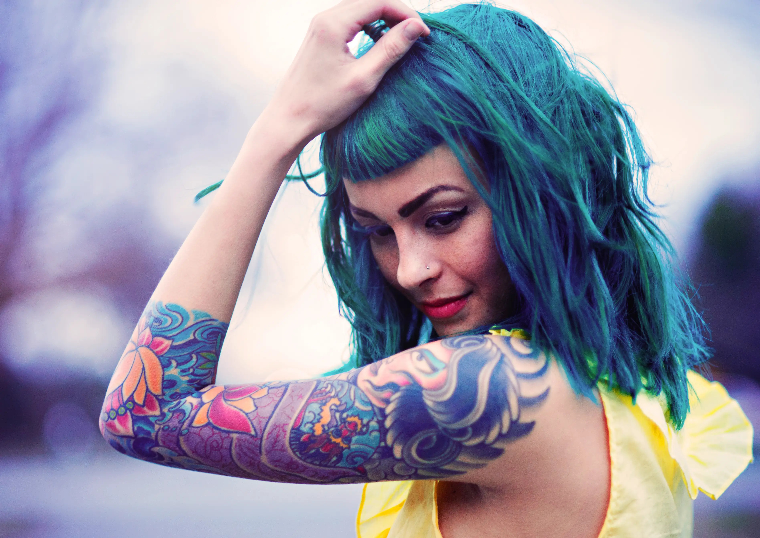

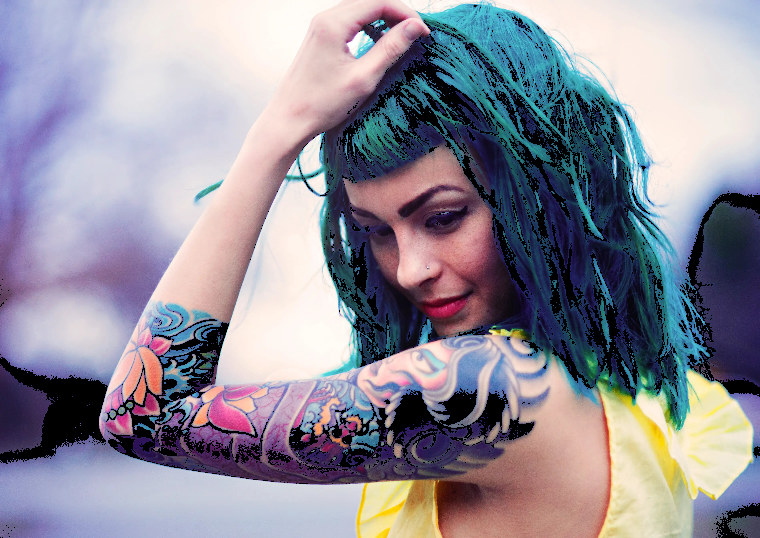

In [4]:
image = imarray("sample.jpg")
image = sizereduct(image,5)

# red=component(image,0)
# green=component(image,1)
# blue=component(image,2)

im2 = image

show(im2)

for i in range(im2.shape[0]):
    for j in range(im2.shape[1]):
        if im2[i][j][0] < 100 and im2[i][j][1] < 100 and im2[i][j][2] > 100 :
            im2[i][j]=[im2[i][j]]


show(im2)

In [15]:
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit import QuantumCircuit, execute, Aer

# Define the statevector of the Ψ- state
psi_minus = Statevector.from_label('01') - Statevector.from_label('10')
print(psi_minus)
print(DensityMatrix.from_label('00')+DensityMatrix.from_label('11'))

# Define the coefficients
coeff_I = 0.9 / 4
coeff_psi_minus = 0.1

# Construct the density matrix
density_matrix = coeff_I * DensityMatrix.from_label('00') + \
                coeff_psi_minus * psi_minus.to_operator().dot(psi_minus.to_operator())

# Print the density matrix
print(density_matrix.data)


Statevector([ 0.+0.j,  1.+0.j, -1.+0.j,  0.+0.j],
            dims=(2, 2))
DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
              dims=(2, 2))
[[ 0.225+0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.2  +0.j -0.2  +0.j  0.   +0.j]
 [ 0.   +0.j -0.2  +0.j  0.2  +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]]
